# Pandas Test - Real life exercise

In [1]:
import pandas as pd

For visualizations:

In [2]:
import cufflinks as cf; cf.go_offline()
import plotly_express as px

## About the data

The data you are about to load is coming from an Ad recommentation system of the company InBrain. InBrain is a adTech company and specalize in next-level ad recommendation.  
The company has two major products - one giving high quality recommendation while the other is giving an highly yielding recommendation. Inbrain custormers are sending requests, asking for either of the products. 

Once a week, the company is doing an internal quality assements, and sends a sample of its traffic requests to external annotation process, in which the annotators are trained to manually decided whether the recommended Ad is a succes or not. The data contains information about the ad (**ad_id**), the sampled week (**week_id**), the requester company (**requester**), the region of operation (**region**), the recommendation type (Quality/Yield, **recommendation_type**) and the recommendation provider algorithm (**rec_provider**). The annotators are marking whether the recommendation is meeting the Quality/Yield standards (**is_success**) and whether or not the recommendation is severly defected (**is_sever**)

See a sample below:

In [3]:
ad_recs_annotated = pd.read_csv('data/ad_annotations.csv')
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
223278,2021-week_48,AD00SPUOH8,Puentes Company,IN,yes,NaN,Yield,UserPopY
262845,2021-week_51,AD09JCD69K,Search Million Culture,GB,yes,NaN,Yield,RuleBasedY
272824,2022-week_01,AD08ILY0JQ,RelayFoods,DE,yes,NaN,Qality,DNNQ
12015,2021-week_33,AD00PXHOP8,Extreme DA,US,yes,NaN,Yield,RuleBasedY
30118,2021-week_35,AD07GX88HZ,SOLOMO365,DE,no,True,Qality,DNNQ


Your job, as the new and only data scientist of the company, is to get familiar with the the data, show week-over-week trends and produce insightfull graphs as a preparation to a full blown BI dashboard.

## Questions

### Data Modifications

1. Add a column with the sample year x
1. Add a column with the sample quarter (google how to)
1. Add a new success column with values 1 and 0 for yes and no x
1. Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. x 
1. Capitlize (first letter only) the is_success column (in place)

### Data Modifications - my answers

In [4]:
ad_recs_annotated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373788 entries, 0 to 373787
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   week_id              373788 non-null  object
 1   ad_id                373788 non-null  object
 2   requester            373788 non-null  object
 3   region               373788 non-null  object
 4   is_success           373788 non-null  object
 5   is_sever             69593 non-null   object
 6   recommendation_type  373788 non-null  object
 7   rec_provider         373788 non-null  object
dtypes: object(8)
memory usage: 22.8+ MB


#### 1. Add a column with the sample year

In [5]:

ad_recs_annotated['sample_year'] = ad_recs_annotated['week_id'].str[0:4]
ad_recs_annotated.head(1)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year
0,2021-week_33,AD0088VOS,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021


#### 2. Add a column with the sample quarter (google how to)


In [6]:
ad_recs_annotated['quarter'] = ad_recs_annotated['week_id'].apply(lambda w : int(w.split('_')[1]) // 13 + 1)
ad_recs_annotated.head(1)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,quarter
0,2021-week_33,AD0088VOS,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3


#### 3. Add a new success column with values 1 and 0 for yes and no x

In [7]:
success_dict = {'yes' : 1, 'no' : 0}
ad_recs_annotated['is_success_new'] = ad_recs_annotated['is_success'].map(success_dict)
ad_recs_annotated.head(15)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,quarter,is_success_new
0,2021-week_33,AD0088VOS,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,yes,NaN,Yield,DNNY,2021,3,1
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1
3,2021-week_33,AD89608808,Search Million Culture,DE,yes,NaN,Qality,BooksQ,2021,3,1
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1
5,2021-week_33,AD008DJKGW,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1
6,2021-week_33,AD07PZ8ZXD,SOLOMO365,DE,yes,NaN,Qality,UserPopQ,2021,3,1
7,2021-week_33,AD07NMJ88F,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1
8,2021-week_33,AD088KO800,Fry Multimedia,DE,yes,NaN,Qality,DNNQ,2021,3,1
9,2021-week_33,AD06XJJPQL,RelayFoods,DE,yes,NaN,Qality,UserPopQ,2021,3,1


#### 4. Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs.

In [8]:


print(ad_recs_annotated['is_sever'].value_counts(dropna=False))
print(ad_recs_annotated['is_sever'].isnull().sum())
print(ad_recs_annotated['is_sever'].isna().sum())
ad_recs_annotated['is_sever_new'] = ad_recs_annotated['is_sever'].fillna(False)
print(ad_recs_annotated['is_sever_new'].isna().sum())

NaN      304195
True      44689
False     24904
Name: is_sever, dtype: int64
304195
304195
0


#### 5. Capitlize (first letter only) the is_success column (in place)

In [9]:
"is_success".capitalize()

'Is_success'

In [10]:
ad_recs_annotated = ad_recs_annotated.rename(columns={"is_success": "is_success".capitalize()})
ad_recs_annotated

,week_id,ad_id,requester,region,Is_success,is_sever,recommendation_type,rec_provider,sample_year,quarter,is_success_new,is_sever_new
0,2021-week_33,AD0088VOS,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1,False
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,yes,NaN,Yield,DNNY,2021,3,1,False
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1,False
3,2021-week_33,AD89608808,Search Million Culture,DE,yes,NaN,Qality,BooksQ,2021,3,1,False
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
373783,2022-week_52,AD08KQ8GDG,Extreme DA,US,yes,NaN,Yield,DNNY,2022,5,1,False
373784,2022-week_52,AD07C8XSMN,Fancy,US,yes,NaN,Qality,RNNQ,2022,5,1,False
373785,2022-week_52,AD096LRR88,Extreme DA,US,yes,NaN,Yield,DNNY,2022,5,1,False
373786,2022-week_52,AD08FWNFDO,RelayFoods,US,yes,NaN,Qality,DNNQ,2022,5,1,False


### Subset selection

for each question, sub-select the data by using the conditional selection (`[]`) and the `.query` API. Use `.shape` on the subselection to obtain the result.  
For example:
`df.query('some_condition').shape`

1. How many requests are there in US region? x
1. How many **successful** requests are there in US region? x
1. How many **successful** requests are there in US region, on week 52? x
1. How many requests where delivered by DNNQ, RNNY and UserPopQ together? x 
1. How many requests where delivered by rule based providers? x
1. Select only the requests from 2021 - How many are there? 
1. Select the reqeusts from week 30 to week 40 - How many are there? 
1. Select all the data that comes from the most popular Ad
1. Select all the data that comes from the least popular provider
1. Select the data in which is_sever is None. How big is it? 
1. Select the data in which the requester is a 3 word company
1. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
1. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

##### 1. How many requests are there in US region?


In [11]:
ad_recs_annotated[ad_recs_annotated['region'] == 'US'].shape[0]

103846

In [12]:
ad_recs_annotated.query('region == "US"').shape[0]

103846

#### 2.How many successful requests are there in US region?

In [13]:
ad_recs_annotated[(ad_recs_annotated['region'] == 'US') 
                  & (ad_recs_annotated['is_success_new'] == 1)].shape[0]

88918

In [14]:
ad_recs_annotated.query('region == "US" & is_success_new == 1').shape[0]

88918

#### 3.How many successful requests are there in US region, on week 52?

In [15]:
ad_recs_annotated['week_number'] = ad_recs_annotated['week_id'].apply(lambda x: int(x.split('_')[1]))
ad_recs_annotated.head()

,week_id,ad_id,requester,region,Is_success,is_sever,recommendation_type,rec_provider,sample_year,quarter,is_success_new,is_sever_new,week_number
0,2021-week_33,AD0088VOS,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1,False,33
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,yes,NaN,Yield,DNNY,2021,3,1,False,33
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1,False,33
3,2021-week_33,AD89608808,Search Million Culture,DE,yes,NaN,Qality,BooksQ,2021,3,1,False,33
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1,False,33


In [16]:
ad_recs_annotated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373788 entries, 0 to 373787
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   week_id              373788 non-null  object
 1   ad_id                373788 non-null  object
 2   requester            373788 non-null  object
 3   region               373788 non-null  object
 4   Is_success           373788 non-null  object
 5   is_sever             69593 non-null   object
 6   recommendation_type  373788 non-null  object
 7   rec_provider         373788 non-null  object
 8   sample_year          373788 non-null  object
 9   quarter              373788 non-null  int64 
 10  is_success_new       373788 non-null  int64 
 11  is_sever_new         373788 non-null  bool  
 12  week_number          373788 non-null  int64 
dtypes: bool(1), int64(3), object(9)
memory usage: 34.6+ MB


In [17]:
ad_recs_annotated[(ad_recs_annotated['week_number'] == '52') 
                  & (ad_recs_annotated['region'] == 'US') 
                  & (ad_recs_annotated['is_success_new'] == 1)].shape[0]

0

In [18]:
ad_recs_annotated.query('week_number == "52" & region == "US" & is_success_new == 1').shape[0]

0

#### 4. How many requests where delivered by DNNQ, RNNY and UserPopQ together? x

In [19]:
ad_recs_annotated[ad_recs_annotated['rec_provider'].isin(['DNNQ', 'RNNY', 'UserPopQ'])].shape[0]

200093

In [20]:
ad_recs_annotated.query('rec_provider == "DNNQ" | rec_provider == "RNNY" | rec_provider == "UserPopQ"').shape[0]

200093

#### 5. How many requests where delivered by rule based providers? x

In [21]:
ad_recs_annotated["rec_provider"].value_counts()

DNNQ                 117424
UserPopQ              69937
DNNY                  45116
UserPopY              38600
RuleBasedY            28154
RNNQ                  20983
ManualQ               13844
RNNY                  12732
XGBQ                  12250
XGBY                   4276
BooksY                 4150
UserPopSelectionQ      2417
ManualY                1982
BooksQ                 1720
RuleBased               182
UserPopSelectionY        21
Name: rec_provider, dtype: int64

In [22]:
ad_recs_annotated[ad_recs_annotated["rec_provider"].str.contains('RuleBased')].shape[0]

28336

In [23]:
ad_recs_annotated.query('rec_provider == "RuleBased" | rec_provider == "RuleBasedY"').shape[0]

28336

#### 6. Select only the requests from 2021 - How many are there?

In [24]:
ad_recs_annotated[ad_recs_annotated["sample_year"] == '2021'].shape[0]

271615

In [25]:
ad_recs_annotated.query('sample_year == "2021"').shape[0]

271615

#### 7. Select the reqeusts from week 30 to week 40 - How many are there?

In [26]:
ad_recs_annotated[(ad_recs_annotated["week_number"] >= 30) & (ad_recs_annotated["week_number"] <= 40) ].shape[0]

115051

In [27]:
ad_recs_annotated.query('week_number >= 30 & week_number <= 40').shape[0]

115051

#### 8. Select all the data that comes from the most popular Ad

In [28]:
ad_recs_annotated.head(2)

,week_id,ad_id,requester,region,Is_success,is_sever,recommendation_type,rec_provider,sample_year,quarter,is_success_new,is_sever_new,week_number
0,2021-week_33,AD0088VOS,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1,False,33
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,yes,NaN,Yield,DNNY,2021,3,1,False,33


In [29]:
popular_ad_id = ad_recs_annotated[ad_recs_annotated["Is_success"] == "yes"].ad_id.value_counts().index[0]
popular_ad_id

'AD07PFFMP9'

In [30]:
ad_recs_annotated[ad_recs_annotated['ad_id'] == popular_ad_id].head()

,week_id,ad_id,requester,region,Is_success,is_sever,recommendation_type,rec_provider,sample_year,quarter,is_success_new,is_sever_new,week_number
7031,2021-week_33,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ,2021,3,1,False,33
7032,2021-week_33,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ,2021,3,1,False,33
20010,2021-week_34,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ,2021,3,1,False,34
20011,2021-week_34,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ,2021,3,1,False,34
35214,2021-week_35,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ,2021,3,1,False,35


In [31]:
ad_recs_annotated.query('ad_id == @popular_ad_id').head()

,week_id,ad_id,requester,region,Is_success,is_sever,recommendation_type,rec_provider,sample_year,quarter,is_success_new,is_sever_new,week_number
7031,2021-week_33,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ,2021,3,1,False,33
7032,2021-week_33,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ,2021,3,1,False,33
20010,2021-week_34,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ,2021,3,1,False,34
20011,2021-week_34,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ,2021,3,1,False,34
35214,2021-week_35,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ,2021,3,1,False,35


#### 9. Select all the data that comes from the least popular provider

In [32]:
unpopular_prov = ad_recs_annotated[(ad_recs_annotated["is_sever"] == True)].rec_provider.value_counts().index[0]
unpopular_prov

'DNNQ'

In [33]:
ad_recs_annotated[ad_recs_annotated['rec_provider'] == unpopular_prov].head()

,week_id,ad_id,requester,region,Is_success,is_sever,recommendation_type,rec_provider,sample_year,quarter,is_success_new,is_sever_new,week_number
0,2021-week_33,AD0088VOS,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1,False,33
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1,False,33
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1,False,33
5,2021-week_33,AD008DJKGW,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1,False,33
7,2021-week_33,AD07NMJ88F,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1,False,33


In [34]:
ad_recs_annotated.query('rec_provider== @unpopular_prov').head()

,week_id,ad_id,requester,region,Is_success,is_sever,recommendation_type,rec_provider,sample_year,quarter,is_success_new,is_sever_new,week_number
0,2021-week_33,AD0088VOS,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1,False,33
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1,False,33
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1,False,33
5,2021-week_33,AD008DJKGW,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1,False,33
7,2021-week_33,AD07NMJ88F,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1,False,33


In [35]:
ad_recs_annotated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373788 entries, 0 to 373787
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   week_id              373788 non-null  object
 1   ad_id                373788 non-null  object
 2   requester            373788 non-null  object
 3   region               373788 non-null  object
 4   Is_success           373788 non-null  object
 5   is_sever             69593 non-null   object
 6   recommendation_type  373788 non-null  object
 7   rec_provider         373788 non-null  object
 8   sample_year          373788 non-null  object
 9   quarter              373788 non-null  int64 
 10  is_success_new       373788 non-null  int64 
 11  is_sever_new         373788 non-null  bool  
 12  week_number          373788 non-null  int64 
dtypes: bool(1), int64(3), object(9)
memory usage: 34.6+ MB


#### 10. Select the data in which is_sever is None. How big is it?

In [36]:
ad_recs_annotated[ad_recs_annotated['is_sever'].isna()].shape[0]

304195

In [37]:
ad_recs_annotated.query('is_sever != True and is_sever != False').shape[0]

304195

#### 11. Select the data in which the requester is a 3 word company

In [38]:
ad_recs_annotated[ad_recs_annotated['requester'].apply(lambda x : len(x.split(' ')) == 3)].sample(5)

,week_id,ad_id,requester,region,Is_success,is_sever,recommendation_type,rec_provider,sample_year,quarter,is_success_new,is_sever_new,week_number
31917,2021-week_35,AD08SK88DV,MoJoe Brewing Company,GB,yes,NaN,Yield,RNNY,2021,3,1,False,35
216076,2021-week_48,AD07VQ8GC8,MoJoe Brewing Company,DE,yes,NaN,Yield,UserPopY,2021,4,1,False,48
360983,2022-week_52,AD078V8V8D,MoJoe Brewing Company,GB,yes,NaN,Yield,DNNY,2022,5,1,False,52
373689,2022-week_52,AD078WDG8W,MoJoe Brewing Company,US,yes,NaN,Yield,RNNY,2022,5,1,False,52
58199,2021-week_37,AD078FZSGD,Search Million Culture,DE,no,True,Qality,DNNQ,2021,3,0,True,37


In [39]:
ad_recs_annotated[ad_recs_annotated['requester'].apply(lambda x : len(x.split(' ')) == 3)].requester.value_counts()

Search Million Culture          86540
MoJoe Brewing Company           31210
Doctorfun Entertainment, Ltd      204
Mission Street Manufacturing      186
PureSafe water systems              1
Name: requester, dtype: int64

In [40]:
#I have not managed to do it with query

#### 12. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it

In [41]:
ad_recs_annotated[(ad_recs_annotated['requester'].apply(lambda x : len(x.split(' ')) == 3)) 
                  & (ad_recs_annotated['ad_id'].str.contains('6'))].sample(5)

,week_id,ad_id,requester,region,Is_success,is_sever,recommendation_type,rec_provider,sample_year,quarter,is_success_new,is_sever_new,week_number
343589,2022-week_06,AD60888889,Search Million Culture,DE,yes,NaN,Qality,BooksQ,2022,1,1,False,6
190649,2021-week_46,AD08LW6CIJ,Search Million Culture,GB,no,False,Qality,UserPopQ,2021,4,0,False,46
177684,2021-week_45,AD07VCF86W,MoJoe Brewing Company,GB,yes,NaN,Yield,DNNY,2021,4,1,False,45
234585,2021-week_49,AD09C68ZLD,Search Million Culture,GB,yes,NaN,Qality,XGBQ,2021,4,1,False,49
29516,2021-week_35,AD0969CXQH,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1,False,35


In [42]:
#I have not managed to do it with query

#### 13. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

In [43]:
def check30(x):
    sum_numbers = []
    for letter in x:
        if letter.isalpha() == False :
            sum_numbers.append(int(letter))
        else :
            pass
    return sum(sum_numbers)

In [44]:
check30('AD08H8SK88')

32

In [45]:
ad_recs_annotated[(ad_recs_annotated['requester'].apply(lambda x : len(x.split(' ')) == 3)) 
                  & (ad_recs_annotated['ad_id'].apply(check30) > 30)].sample(5)

,week_id,ad_id,requester,region,Is_success,is_sever,recommendation_type,rec_provider,sample_year,quarter,is_success_new,is_sever_new,week_number
331561,2022-week_05,AD0789MVS7,MoJoe Brewing Company,GB,no,True,Yield,XGBY,2022,1,0,True,5
6063,2021-week_33,AD09788LN8,Search Million Culture,IN,yes,NaN,Qality,UserPopQ,2021,3,1,False,33
91312,2021-week_39,AD06XX8788,Search Million Culture,GB,yes,NaN,Qality,RNNQ,2021,4,1,False,39
190040,2021-week_46,AD06988988,Search Million Culture,GB,yes,NaN,Qality,UserPopQ,2021,4,1,False,46
187805,2021-week_46,AD09GCG797,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,4,1,False,46


### Analysis

1. How many weeks available in the data? Are there any missing weeks? x
1. How many regions available in the data? Are there any missing weeks per region? x
1. How many ads are being sent to annotation in each region per week?
1. How many None values are there in is_sever column? 
1. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
1. Are there ads that are being sent in more than one week? x
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
1. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
1. Per each region, What is the Quality/Yield traffic proportion WoW? 
1. How many different reqeusters are there? 
1. Which are the top 5 requesters per region? 
1. Which are the different rec_proivders?
1. Are there different rec providers per region? 
1. Are there different rec providers per rec type?
1. What are the notation rules distinguishing between quality vs yielding providers?
1. Which is the most successful region of operation? 
1. Which is the most successful rec provider per each region? 
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
1. Present WoW table/graph with success rate and CI (see image below) per region
1. Present WoW table/graph with success rate and CI (see image below) per region and rec type
1. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
1. Which are the requester to which we succeed the most?
1. Which are the requester to which we produce the most critical defects?
1. What is the overall success rate trend over time? 
1. What is the overall sever defect rate trend over time? 
1. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients
1. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients


#### 1. How many weeks available in the data? Are there any missing weeks? 

In [46]:
len(set(ad_recs_annotated['week_number']))

26

In [47]:
sorted(ad_recs_annotated.week_id.unique())

['2021-week_33',
 '2021-week_34',
 '2021-week_35',
 '2021-week_36',
 '2021-week_37',
 '2021-week_38',
 '2021-week_39',
 '2021-week_40',
 '2021-week_41',
 '2021-week_42',
 '2021-week_43',
 '2021-week_44',
 '2021-week_45',
 '2021-week_46',
 '2021-week_47',
 '2021-week_48',
 '2021-week_49',
 '2021-week_50',
 '2021-week_51',
 '2022-week_01',
 '2022-week_02',
 '2022-week_03',
 '2022-week_04',
 '2022-week_05',
 '2022-week_06',
 '2022-week_52']

#### 2.How many regions available in the data? Are there any missing weeks per region? x

In [48]:
#option 1:

In [49]:
ad_recs_annotated.groupby('region').week_number.unique()

region
DE    [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...
GB    [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...
IN    [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...
JP    [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...
US    [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...
Name: week_number, dtype: object

In [50]:
l = list(range (33, 53))+list(range(1,7))
def find_missing_week_id(week_ids):
    missing_weeks = []
    for i in l:
        if i not in week_ids:
            missing_weeks.append(i)
    return missing_weeks

In [51]:
ad_recs_annotated.groupby('region').week_number.unique().apply(find_missing_week_id)

region
DE      []
GB      []
IN      []
JP    [51]
US      []
Name: week_number, dtype: object

In [52]:
#option 2

In [53]:
row_count_per_week_and_region = ad_recs_annotated.groupby(['week_id', 'region']).size()
row_count_per_week_and_region.head()

week_id       region
2021-week_33  DE        2395
              GB        3180
              IN        3196
              JP        1611
              US        3974
dtype: int64

In [54]:
row_count_per_week_and_region = row_count_per_week_and_region.unstack('region')
row_count_per_week_and_region

region,DE,GB,IN,JP,US
week_id,,,,,
2021-week_33,2395.0,3180.0,3196.0,1611.0,3974.0
2021-week_34,2360.0,3187.0,3219.0,1599.0,4006.0
2021-week_35,2393.0,3209.0,3209.0,1580.0,3982.0
2021-week_36,2401.0,3209.0,3213.0,1589.0,3978.0
2021-week_37,2404.0,3181.0,3183.0,1644.0,3980.0
2021-week_38,2400.0,3188.0,3175.0,1594.0,3990.0
2021-week_39,2407.0,3206.0,3212.0,1593.0,3998.0
2021-week_40,2399.0,3211.0,3191.0,1618.0,3987.0
2021-week_41,2399.0,3202.0,3214.0,1573.0,3992.0


In [55]:
ad_recs_annotated.groupby(['week_id', 'region']).size().unstack(['region']).apply(lambda row: 'None' if row.isnull().sum() == 0 else row[row.isnull()].index)

region
DE                                                 None
GB                                                 None
IN                                                 None
JP    Index(['2021-week_51'], dtype='object', name='...
US                                                 None
dtype: object

In [56]:
#NaN for JP in week51

#### 3. How many ads are being sent to annotation in each region per week?

In [57]:
pd.DataFrame(ad_recs_annotated.groupby(['region','week_id']).ad_id.count())

ad_id
region week_id            
DE     2021-week_33   2395
       2021-week_34   2360
       2021-week_35   2393
       2021-week_36   2401
       2021-week_37   2404
...                    ...
US     2022-week_03   3979
       2022-week_04   3999
       2022-week_05   3998
       2022-week_06   3992
       2022-week_52   3998

[129 rows x 1 columns]

#### 4. How many None values are there in is_sever column?

In [58]:
ad_recs_annotated.is_sever.value_counts(dropna = False)#.isna().sum()

NaN      304195
True      44689
False     24904
Name: is_sever, dtype: int64

In [59]:
ad_recs_annotated.is_sever.isna().sum()

304195

#### 5.Are ads being sent more than one time in a given week? (e.g. ad X where sent 50 times in week Y)

In [60]:
df = pd.DataFrame(ad_recs_annotated.groupby(['ad_id','week_id']).ad_id.count())
df.query('ad_id > 1')

ad_id
ad_id      week_id            
AD000068FZ 2022-week_01      2
AD00006IFH 2021-week_40      2
AD00006YYX 2022-week_03      2
AD000078LU 2021-week_48      2
AD0000888U 2021-week_50      2
...                        ...
AD98898880 2021-week_35      2
           2021-week_49      3
AD98898888 2021-week_51      2
AD98907888 2021-week_51      2
AD98908668 2021-week_42      2

[9176 rows x 1 columns]

In [61]:
#testing the code above on one example :
ad_recs_annotated[(ad_recs_annotated['ad_id'] == 'AD000068FZ') & (ad_recs_annotated['week_id'] == '2022-week_01')]

,week_id,ad_id,requester,region,Is_success,is_sever,recommendation_type,rec_provider,sample_year,quarter,is_success_new,is_sever_new,week_number
282557,2022-week_01,AD000068FZ,Fancy,US,yes,NaN,Qality,ManualQ,2022,1,1,False,1
282558,2022-week_01,AD000068FZ,Tab Solutions,US,yes,NaN,Qality,ManualQ,2022,1,1,False,1


In [62]:
# what is the ad_id that was sent the most in a given week? 
df.loc[df.idxmax()]

,,ad_id
ad_id,week_id,
AD098SWYF6,2021-week_40,81


#### 6. Are there ads that are being sent in more than one week? x

In [63]:
df2 = pd.DataFrame(ad_recs_annotated.groupby(['ad_id']).week_id.nunique())
df2.query('week_id > 1')

,week_id
ad_id,
AD00000888,2
AD00000DMF,2
AD00000ISC,2
AD00000IV8,2
AD00000IZK,2
...,...
AD98908668,10
AD98908888,2
AD98908988,3


#### 6.A. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)

In [64]:
df2.loc[df2.idxmax()]

,week_id
ad_id,
AD079VP6DH,26


In [65]:
#checking this ad in the data set :
ad_recs_annotated[(ad_recs_annotated['ad_id'] == 'AD079VP6DH')].shape
    # there are 78 occurences of this ad but we've counted only unique week_ids so 26

(78, 13)

#### 6.B. What are the weeks that the ad from above was sent in?

In [66]:
ad_recs_annotated[(ad_recs_annotated['ad_id'] == 'AD079VP6DH')].week_id.unique()

array(['2021-week_33', '2021-week_34', '2021-week_35', '2021-week_36',
       '2021-week_37', '2021-week_38', '2021-week_39', '2021-week_40',
       '2021-week_41', '2021-week_42', '2021-week_43', '2021-week_44',
       '2021-week_45', '2021-week_46', '2021-week_47', '2021-week_48',
       '2021-week_49', '2021-week_50', '2021-week_51', '2022-week_01',
       '2022-week_02', '2022-week_03', '2022-week_04', '2022-week_05',
       '2022-week_06', '2022-week_52'], dtype=object)

#### 6.C. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.

In [67]:
#ad_ids that were sent in more than one week
i = df2.query('week_id > 1').index 

In [68]:
# filter only the ads that were sent in more than one week
df3 = ad_recs_annotated[ad_recs_annotated['ad_id'].isin(i)].sort_values(by = ['ad_id', 'week_id'])
df3.head(10)

,week_id,ad_id,requester,region,Is_success,is_sever,recommendation_type,rec_provider,sample_year,quarter,is_success_new,is_sever_new,week_number
146710,2021-week_43,AD00000888,RelayFoods,GB,yes,NaN,Qality,DNNQ,2021,4,1,False,43
286829,2022-week_02,AD00000888,Search Million Culture,DE,yes,NaN,Qality,BooksQ,2022,1,1,False,2
125508,2021-week_41,AD00000DMF,iDreamsky Technology,US,yes,NaN,Qality,ManualQ,2021,4,1,False,41
244257,2021-week_49,AD00000DMF,Extreme DA,US,yes,NaN,Yield,RuleBasedY,2021,4,1,False,49
305247,2022-week_03,AD00000ISC,Bizanga,GB,no,True,Yield,DNNY,2022,1,0,True,3
333988,2022-week_05,AD00000ISC,Bizanga,GB,no,True,Yield,DNNY,2022,1,0,True,5
11928,2021-week_33,AD00000IV8,Search Million Culture,US,yes,NaN,Qality,DNNQ,2021,3,1,False,33
98566,2021-week_39,AD00000IV8,Extreme DA,US,yes,NaN,Yield,DNNY,2021,4,1,False,39
12366,2021-week_33,AD00000IZK,Extreme DA,US,yes,NaN,Yield,RuleBasedY,2021,3,1,False,33
348727,2022-week_06,AD00000IZK,Search Million Culture,GB,yes,NaN,Qality,UserPopQ,2022,1,1,False,6


In [69]:
#groupby ad_id and week_id, and sum the is_success boolean (can be 0, 1, or more if it appears several times in the same week)
grouped_df = df3.groupby(['ad_id','week_id']).is_success_new.sum().to_frame()
grouped_df

is_success_new
ad_id      week_id                     
AD00000888 2021-week_43               1
           2022-week_02               1
AD00000DMF 2021-week_41               1
           2021-week_49               1
AD00000ISC 2022-week_03               0
...                                 ...
AD98908988 2022-week_04               0
AD98988898 2021-week_43               1
           2022-week_05               1
ADOO8X898E 2021-week_41               1
           2021-week_50               1

[89477 rows x 1 columns]

In [70]:
# groupby grouped_df to create a list of the results at ad_id level
df4 = pd.DataFrame(grouped_df.groupby(['ad_id'])['is_success_new'].apply(list))
df4

,is_success_new
ad_id,
AD00000888,"[1, 1]"
AD00000DMF,"[1, 1]"
AD00000ISC,"[0, 0]"
AD00000IV8,"[1, 1]"
AD00000IZK,"[1, 1]"
...,...
AD98908668,"[1, 1, 1, 1, 2, 1, 1, 1, 1, 1]"
AD98908888,"[0, 0]"
AD98908988,"[1, 1, 0]"


In [71]:
# function to spot whether 0s are mixed with non-0s, or not, in a list
def several_output(row):
    if 0 in row and sum(row)>0:
        return True
    else:
        return False 

In [72]:
# filter only ad_ids with a mix of 0s and non-0s
df4[df4['is_success_new'].apply(several_output)]

,is_success_new
ad_id,
AD00006IDK,"[1, 0]"
AD00006IEI,"[1, 1, 1, 0]"
AD00007F8Q,"[1, 1, 0, 1]"
AD00007K6N,"[0, 1]"
AD00008808,"[1, 1, 1, 1, 0]"
...,...
AD98888868,"[0, 1]"
AD98888878,"[1, 0]"
AD98888888,"[1, 1, 1, 1, 0, 1, 1, 1]"


In [73]:
# assign these ad_ids to the variable i
i  = df4[df4['is_success_new'].apply(several_output)].index

In [74]:
#filter the original dataset on these ad_ids only
ad_recs_annotated[ad_recs_annotated['ad_id'].isin(i)].sort_values(by = 'ad_id').head(10)

,week_id,ad_id,requester,region,Is_success,is_sever,recommendation_type,rec_provider,sample_year,quarter,is_success_new,is_sever_new,week_number
188039,2021-week_46,AD00006IDK,RelayFoods,DE,no,True,Qality,DNNQ,2021,4,0,True,46
10424,2021-week_33,AD00006IDK,Extreme DA,US,yes,NaN,Yield,DNNY,2021,3,1,False,33
170677,2021-week_44,AD00006IEI,Extreme DA,US,yes,NaN,Yield,DNNY,2021,4,1,False,44
114357,2021-week_40,AD00006IEI,Extreme DA,US,yes,NaN,Yield,DNNY,2021,4,1,False,40
328271,2022-week_04,AD00006IEI,Fancy,US,no,True,Qality,UserPopQ,2022,1,0,True,4
257205,2021-week_50,AD00006IEI,Sensor Tower,US,yes,NaN,Yield,DNNY,2021,4,1,False,50
44981,2021-week_36,AD00007F8Q,iDreamsky Technology,DE,yes,NaN,Qality,UserPopQ,2021,3,1,False,36
230561,2021-week_49,AD00007F8Q,LocalVox Media,DE,yes,NaN,Yield,DNNY,2021,4,1,False,49
159699,2021-week_44,AD00007F8Q,LocalVox Media,DE,no,True,Yield,UserPopY,2021,4,0,True,44
102029,2021-week_40,AD00007F8Q,Search Million Culture,DE,yes,NaN,Qality,UserPopQ,2021,4,1,False,40


#### 7. When is_sever is None, what is the number of successful requests?

In [75]:
ad_recs_annotated[(ad_recs_annotated['is_sever'].isna()) & (ad_recs_annotated['Is_success'] == 'yes')].shape[0]

304189

In [76]:
# What is the number of non-successful requests?

In [77]:
ad_recs_annotated[(ad_recs_annotated['is_sever'].isna()) & (ad_recs_annotated['Is_success'] == 'no')].shape[0]

6

In [78]:
# What do you learn from it about the reason for Nones in the first place?

In [79]:
# non-successful requests' severity should be categorized as True/False.
# It seems like 6 unsuccesfuls observations were not categorized, by mistake.

#### 8. Per each region, What is the Quality/Yield traffic proportion WoW?

In [80]:
ad_recs_annotated.head()

,week_id,ad_id,requester,region,Is_success,is_sever,recommendation_type,rec_provider,sample_year,quarter,is_success_new,is_sever_new,week_number
0,2021-week_33,AD0088VOS,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1,False,33
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,yes,NaN,Yield,DNNY,2021,3,1,False,33
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1,False,33
3,2021-week_33,AD89608808,Search Million Culture,DE,yes,NaN,Qality,BooksQ,2021,3,1,False,33
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1,False,33


In [81]:
q8 = ad_recs_annotated.groupby(['region','week_id','recommendation_type']).ad_id.count().unstack('recommendation_type')
q8

recommendation_type  Qality  Yield
region week_id                    
DE     2021-week_33    1908    487
       2021-week_34    1975    385
       2021-week_35    1850    543
       2021-week_36    1928    473
       2021-week_37    1895    509
...                     ...    ...
US     2022-week_03    1347   2632
       2022-week_04    1455   2544
       2022-week_05    1395   2603
       2022-week_06    1469   2523
       2022-week_52    1299   2699

[129 rows x 2 columns]

In [82]:
q8['proportion'] = q8['Qality']/q8['Yield']
q8

recommendation_type  Qality  Yield  proportion
region week_id                                
DE     2021-week_33    1908    487    3.917864
       2021-week_34    1975    385    5.129870
       2021-week_35    1850    543    3.406998
       2021-week_36    1928    473    4.076110
       2021-week_37    1895    509    3.722986
...                     ...    ...         ...
US     2022-week_03    1347   2632    0.511778
       2022-week_04    1455   2544    0.571934
       2022-week_05    1395   2603    0.535920
       2022-week_06    1469   2523    0.582243
       2022-week_52    1299   2699    0.481289

[129 rows x 3 columns]

#### 9. How many different reqeusters are there?

In [83]:
len(ad_recs_annotated.requester.unique())

36

#### 10. Which are the top 5 requesters per region?

In [84]:
q10_1 = ad_recs_annotated.groupby(['region','requester']).ad_id.count().reset_index()
q10_1

,region,requester,ad_id
0,DE,Allthetopbananas.com,51
1,DE,Bizanga,107
2,DE,Crescendo Networks,573
3,DE,Cuiker,6
4,DE,Extreme DA,115
...,...,...,...
105,US,Sensor Tower,3503
106,US,Tab Solutions,9790
107,US,VarVee,119
108,US,aPriori Technologies,57


In [85]:
q10_2 = q10_1.sort_values(by=['region', 'ad_id'], ascending=[True, False]).groupby(['region']).head(5).reset_index(drop = True)
q10_2

,region,requester,ad_id
0,DE,Search Million Culture,23657
1,DE,RelayFoods,17313
2,DE,MoJoe Brewing Company,8616
3,DE,iDreamsky Technology,3542
4,DE,SOLOMO365,2435
5,GB,Search Million Culture,28002
6,GB,RelayFoods,15920
7,GB,Fancy,13678
8,GB,MoJoe Brewing Company,9530
9,GB,iDreamsky Technology,3919


#### 11. Which are the different rec_proivders?

In [86]:
unique_rec_prov = ad_recs_annotated.rec_provider.unique().tolist()
unique_rec_prov

['DNNQ',
 'DNNY',
 'BooksQ',
 'UserPopQ',
 'UserPopY',
 'RuleBasedY',
 'ManualY',
 'ManualQ',
 'BooksY',
 'XGBQ',
 'XGBY',
 'RNNQ',
 'RNNY',
 'RuleBased',
 'UserPopSelectionQ',
 'UserPopSelectionY']

#### 12. Are there different rec providers per region?

In [87]:
unique_regions = ad_recs_annotated.region.unique().tolist()
unique_regions

['DE', 'GB', 'IN', 'JP', 'US']

In [88]:
q12 = {}
for region in unique_regions:    
    this_region = ad_recs_annotated[ad_recs_annotated['region'] == f'{region}']
    this_region_providers = this_region.rec_provider.unique().tolist()
    q12_1 = {f'{region}' : this_region_providers}
    q12.update(q12_1)
q12

{'DE': ['DNNQ',
  'DNNY',
  'BooksQ',
  'UserPopQ',
  'UserPopY',
  'RuleBasedY',
  'ManualY',
  'ManualQ',
  'BooksY'],
 'GB': ['DNNY',
  'XGBQ',
  'DNNQ',
  'XGBY',
  'RNNQ',
  'UserPopQ',
  'ManualQ',
  'RNNY',
  'UserPopY',
  'RuleBasedY',
  'ManualY',
  'RuleBased'],
 'IN': ['UserPopY',
  'RuleBasedY',
  'UserPopQ',
  'ManualY',
  'ManualQ',
  'RuleBased'],
 'JP': ['ManualQ',
  'UserPopQ',
  'RuleBasedY',
  'DNNQ',
  'ManualY',
  'DNNY',
  'UserPopY',
  'UserPopSelectionQ',
  'UserPopSelectionY'],
 'US': ['DNNY',
  'ManualQ',
  'DNNQ',
  'UserPopY',
  'XGBY',
  'RNNY',
  'ManualY',
  'RNNQ',
  'RuleBasedY',
  'XGBQ',
  'UserPopQ',
  'BooksY',
  'BooksQ',
  'RuleBased']}

In [89]:
#Yes, there are different rec_providers per region

#### 13. Are there different rec providers per rec type?

In [90]:
unique_rectype = ad_recs_annotated.recommendation_type.unique().tolist()
unique_rectype

['Qality', 'Yield']

In [91]:
q13 = {}
for rectype in unique_rectype:    
    this_rectype = ad_recs_annotated[ad_recs_annotated['recommendation_type'] == f'{rectype}']
    this_rectype_providers = this_rectype.rec_provider.unique().tolist()
    q13_1 = {f'{rectype}' : this_rectype_providers}
    q13.update(q13_1)
q13

{'Qality': ['DNNQ',
  'BooksQ',
  'UserPopQ',
  'ManualY',
  'ManualQ',
  'XGBQ',
  'RNNQ',
  'RuleBased',
  'UserPopSelectionQ'],
 'Yield': ['DNNY',
  'UserPopY',
  'RuleBasedY',
  'BooksY',
  'ManualY',
  'ManualQ',
  'XGBY',
  'RNNY',
  'UserPopSelectionY']}

In [92]:
#Yes, there are different rec_providers per rec type

#### 14. What are the notation rules distinguishing between quality vs yielding providers?

In [93]:
q14=pd.DataFrame(q13)
q14['Qality_last_letter'] = q14.Qality.apply(lambda x : x[-1])
q14['Yield_last_letter'] = q14.Yield.apply(lambda x : x[-1])
q14

,Qality,Yield,Qality_last_letter,Yield_last_letter
0,DNNQ,DNNY,Q,Y
1,BooksQ,UserPopY,Q,Y
2,UserPopQ,RuleBasedY,Q,Y
3,ManualY,BooksY,Y,Y
4,ManualQ,ManualY,Q,Y
5,XGBQ,ManualQ,Q,Q
6,RNNQ,XGBY,Q,Y
7,RuleBased,RNNY,d,Y
8,UserPopSelectionQ,UserPopSelectionY,Q,Y


In [94]:
# In most of the cases, names of Quality providers end with a "Q", but some mistakenly end with a Y, or neither Q or Y.
# Similarly, names of Yield providers end with a "Y", but some mistakenly end with a Q.

#### 15. Which is the most successful region of operation?

In [95]:
ad_recs_annotated.groupby('region').is_success_new.sum().sort_values(ascending = False).head(1)

region
US    88918
Name: is_success_new, dtype: int64

#### 16. Which is the most successful rec provider per each region?

In [96]:
q16_1 = ad_recs_annotated.groupby(['region','rec_provider']).is_success_new.sum().reset_index()
q16_1

,region,rec_provider,is_success_new
0,DE,BooksQ,1082
1,DE,BooksY,1215
2,DE,DNNQ,27215
3,DE,DNNY,4969
4,DE,ManualQ,830
5,DE,ManualY,581
6,DE,RuleBasedY,1022
7,DE,UserPopQ,11098
8,DE,UserPopY,2612
9,GB,DNNQ,34681


In [97]:
q16_2 = q16_1.sort_values(by=['region', 'is_success_new'], ascending=[True, False]).groupby(['region']).head(1).reset_index(drop = True)
q16_2

,region,rec_provider,is_success_new
0,DE,DNNQ,27215
1,GB,DNNQ,34681
2,IN,UserPopQ,30407
3,JP,DNNQ,20113
4,US,DNNY,25705


#### 21.Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region

In [126]:
import numpy as np
from scipy import stats

def CI(myseries,alpha = 0.05, n_sided = 2):
    z_alpha = stats.norm.ppf(1-alpha/n_sided)
    mu = myseries.mean()
    sig = myseries.std()
    upper_bound = mu + z_alpha * sig
    lower_bound = mu - z_alpha * sig
    return upper_bound, lower_bound

In [127]:
q21 = pd.DataFrame({
'success_rate': ad_recs_annotated.groupby(['recommendation_type','region']).is_success_new.mean(),
'CI_suc': ad_recs_annotated.groupby(['recommendation_type','region']).is_success_new.apply(CI),
'sever_defects_rate': ad_recs_annotated.groupby(['recommendation_type','region']).is_sever_new.mean(),
'CI_sev': ad_recs_annotated.groupby(['recommendation_type','region']).is_sever_new.apply(CI)
})
q21

success_rate  \
recommendation_type region                 
Qality              DE          0.806681   
                    GB          0.850367   
                    IN          0.806129   
                    JP          0.777806   
                    US          0.899070   
Yield               DE          0.845986   
                    GB          0.772476   
                    IN          0.719186   
                    JP          0.683988   
                    US          0.828812   

                                                                CI_suc  \
recommendation_type region                                               
Qality              DE       (1.5806805607586214, 0.03268060834367503)   
                    GB        (1.549513654171069, 0.15121974352067347)   
                    IN      (1.5809688987454726, 0.031289986988396024)   
                    JP       (1.592615391699257, -0.03700344887594664)   
                    US       (1.4894884519872895, 0.30865225276944874)   
Yield               DE       (1.5534890426339985, 0.13848200601101068)   
                    GB      (1.5941889827145053, -0.04923647553535804)   
                    IN      (1.5999979769554633, -0.16162626876199748)   
                    JP      (1.5952839032445885, -0.22730728746024287)   
                    US       (1.5670836342292476, 0.09054043162321623)   

                            sever_defects_rate  \
recommendation_type region                       
Qality              DE                0.121503   
                    GB                0.108295   
                    IN                0.088980   
                    JP                0.156587   
                    US                0.074470   
Yield               DE                0.080121   
                    GB                0.177675   
                    IN                0.191504   
                    JP                0.146639   
                    US                0.102444   

                                                                CI_sev  
recommendation_type region                                              
Qality              DE       (0.7618514199113504, -0.5188451568633337)  
                    GB       (0.7173634437332875, -0.5007733827849136)  
                    IN       (0.647016701967305, -0.46905723853834186)  
                    JP       (0.8688706575224375, -0.5556957724114956)  
                    US      (0.5890358325763637, -0.44009494041055597)  
Yield               DE        (0.6122360356600378, -0.451993652222906)  
                    GB        (0.926876290597832, -0.5715269054273733)  
                    IN       (0.9627288458625305, -0.5797209502547578)  
                    JP        (0.840022664753804, -0.5467456267544535)  
                    US       (0.6967718116316629, -0.4918834353499256)

#### 24. Present WoW table/graph with success rate and CI (see image below) per region and rec provider

In [131]:
q24 = pd.DataFrame({'success_rate': ad_recs_annotated.groupby(['week_id', 'region', 'rec_provider']).is_success_new.mean(),
    'CI_per_metric_for_success_rate': ad_recs_annotated.groupby(['week_id', 'region', 'rec_provider']).is_success_new.apply(CI)
                   })
q24

success_rate  \
week_id      region rec_provider                 
2021-week_33 DE     BooksQ            0.838235   
                    BooksY            0.975000   
                    DNNQ              0.827804   
                    DNNY              0.906593   
                    ManualQ           0.865385   
...                                        ...   
2022-week_52 US     RuleBasedY        0.521951   
                    UserPopQ          0.759259   
                    UserPopY          0.650943   
                    XGBQ              0.763441   
                    XGBY              0.902256   

                                              CI_per_metric_for_success_rate  
week_id      region rec_provider                                              
2021-week_33 DE     BooksQ         (1.5653283613961513, 0.11114222683914299)  
                    BooksY          (1.2848975161522806, 0.6651024838477193)  
                    DNNQ            (1.5680821425124902, 0.0875260723374307)  
                    DNNY             (1.478519014393474, 0.3346677987933391)  
                    ManualQ           (1.54087101310017, 0.1898982176690609)  
...                                                                      ...  
2022-week_52 US     RuleBasedY      (1.5021844719901374, -0.458282032965747)  
                    UserPopQ      (1.6050771767133425, -0.08655865819482389)  
                    UserPopY      (1.5866755694198447, -0.28478877696701443)  
                    XGBQ          (1.6008799286288555, -0.07399820819874814)  
                    XGBY            (1.4865041364786884, 0.3180071417168002)  

[1212 rows x 2 columns]

#### 25. Which are the requester to which we succeed the most?

In [142]:
ad_recs_annotated.groupby('requester').is_success_new.sum().reset_index().sort_values(by = 'is_success_new', ascending = False).head()

,requester,is_success_new
30,Search Million Culture,70331
28,RelayFoods,63288
9,Extreme DA,47316
10,Fancy,28519
21,MoJoe Brewing Company,25436


#### 29. Preset a WoW graph showing the number of requests per customer in each region (hint: use stacked bars), from it:

In [143]:
q29 = ad_recs_annotated.groupby(['region', 'week_id','requester']).ad_id.size().reset_index()
q29

,region,week_id,requester,ad_id
0,DE,2021-week_33,Bizanga,7
1,DE,2021-week_33,Crescendo Networks,9
2,DE,2021-week_33,Extreme DA,4
3,DE,2021-week_33,Fry Multimedia,82
4,DE,2021-week_33,G-mode,11
...,...,...,...,...
2064,US,2022-week_52,Sensor Tower,67
2065,US,2022-week_52,Tab Solutions,223
2066,US,2022-week_52,VarVee,2
2067,US,2022-week_52,aPriori Technologies,2


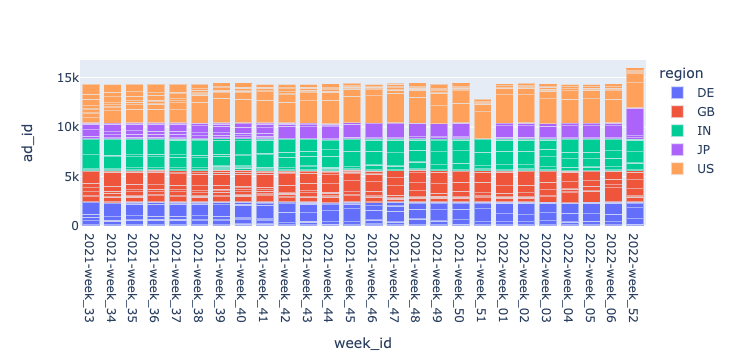

In [148]:
import plotly_express as px
fig = px.bar(q29, x = 'week_id', y = 'ad_id', color = 'region',barmode='stack')
fig.show()

Analysis Bonus questions:
1. Compute the per region success rate and CI in trailing weeks, Say, 4 weeks instead of 1 week - to allow for smoother estimations and smaller CIs

### Compactization

Are there duplicated ads? To compac the data, remove duplicated ads and instead add an ad_count column **(pay attention, this is not trivial at all)** x

### Merges and joins

The Wow samples and annotations task were sent and recieve seperatly, per each week. The dataset you were working on was constructed from those files. You can see the files under the `data/weekly` folder, here are the first 10 files:

In [ ]:
import os
weekly_files = os.listdir('data/weekly/')
sorted(weekly_files)[:10]

Your task is to reconstruct the dataset above. 

### Visualizations

Produce the following success rate graph per region:

Produce the following requestser proportion graph:

## Appendix

Code to create weekly files:

In [ ]:
# for l in ad_recs_annotated.region.unique():
#     for w in ad_recs_annotated.week_id.unique():
#         w_id = w.split('_')[1]
#         y = w.split('-')[0]
#         query = f'week_id == "{w}" and region == "{l}"'
#         sample_f_name = f'{y}_{w_id}_{l}__Sample.csv'
#         ad_recs_annotated.query(query)[['week_id','ad_id','requester','region','recommendation_type', 'rec_provider']].to_csv(f'data/weekly/{sample_f_name}', index=False)
#         for s in ad_recs_annotated.recommendation_type.unique():
#             ann_f_name = f'{y}_{w_id}_{l}_{s}_annotation_result.csv'
#             query = f'week_id == "{w}" and region == "{l}" and recommendation_type == "{s}"'
#             sss = ad_recs_annotated.query(query)
#             if sss.empty:
#                 continue            
#             sss[['region','ad_id','is_success','is_sever']].drop_duplicates(subset=['ad_id']).to_csv(f'data/weekly/{ann_f_name}', index=False)